<a href="https://colab.research.google.com/github/vizzies/Building-BERT-Model/blob/master/word_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wordcloud

In [4]:
import os

from os import path
from wordcloud import WordCloud


import pandas
import unicodedata

def preprocess_text(sen):

    sentence = str(sen)

    # Removing html tags
    sentence = remove_tags(sentence)

    # Remove hyphenation if at the end of a line
    sentence = sentence.replace('-\n', '')

    # Fix ligatures
    sentence = unicodedata.normalize("NFKD", sentence)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

import re
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

pubs = pandas.read_pickle('/content/arc-code-ti-publications.pkl')


# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
# d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = ''
for i, txt in enumerate(pubs['Text']):
    # print(i)
    text += ' ' + preprocess_text(txt)

# Read the whole text.
# text = open(path.join(d, 'constitution.txt')).read()



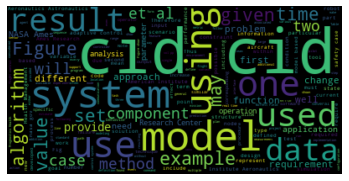

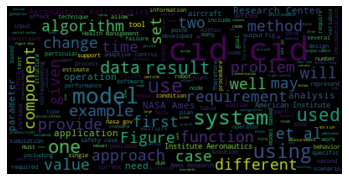

In [5]:
# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()